In [28]:
import pandas as pd
import networkx as nx
import numpy as np
import json
import os

from matplotlib.pyplot import figure

from pyvis.network import Network

#https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675

In [3]:
shared_fields = pd.read_csv("docs/forms/form_data.csv")
shared_fields = shared_fields[["id","jurisdiction","title","fields"]]
shared_fields

,id,jurisdiction,title,fields
0,ed1efd08e3304bdaa887db753509d666,UT,Community Service Worksheet Third District Juv...,[]
1,28ab1fb8df5c477cb4353e44f6d5a404,UT,Third District Juvenile Court Work Program Ref...,[]
2,279083cdac044d22b873a6a6ab8d9a14,UT,Utah State District Juvenile Court Probation O...,[]
3,ebad2caa6be0458d9e5c75635a7f66c2,UT,Adoptee's Consent to Adoption and Waiver of Ri...,[]
4,92932e4f938440ce8b93b6434aedfc3d,UT,Adoption Agreement,[]
...,...,...,...,...
1524,94be7e4a467c46c5b8f18a81df4c3371,MI,Claim of Appeal of Right/Request to Withdraw A...,"['disno', 'caseno', 'judge', 'address', 'telno..."
1525,9d46a79a162844ebb78fc592873c027b,MI,"Default Judgment, Civil Infraction",[]
1526,6d97d3ca4103413b8e161013c26943d6,MI,"Judgment, Civil Infraction","['STATE OF MICHIGAN JUDICIAL DISTRICT COUNTY',..."
1527,480c76eb519d4242a7f44722bb7fbea6,MI,Motion to Set Aside Default Judgment and Order...,"['disno', 'caseno', 'judge', 'address', 'telno..."


In [83]:
jur = "MI"
df_slice = shared_fields[shared_fields["jurisdiction"]==jur][:50]
similar_df = pd.DataFrame([],columns=["id_1","id_2","title_2","similarity"])
for index,row in df_slice.iterrows():
    if pd.notnull(row["fields"]) and row["fields"]!="[]":
        field_list_this_form = eval(row["fields"])
        #print("\n\n")
        #print(field_list)
        
        for index_2,row_2 in tmp_df.iterrows():
            if pd.notnull(row_2["fields"]) and row_2["fields"]!="[]" and row["id"]!=row_2["id"]:
                field_list_that_form = eval(row_2["fields"])
                
                n_fields = len(list(set(field_list_this_form+field_list_that_form)))
                shared_feilds = len(field_list_this_form+field_list_that_form) - len(list(set(field_list_this_form+field_list_that_form)))
                p_similar = shared_feilds/n_fields
                
                #print(row["title"],row_2["title"],p_similar)
                
                similar_df = similar_df.append(pd.DataFrame([[row["id"],row_2["id"],row_2["title"],p_similar]],columns=["id_1","id_2","title_2","similarity"]), ignore_index=True,sort=False)
                
similar_df

,id_1,id_2,title_2,similarity
0,346d754e93274e83bfa8e73e0c651b1d,92df7834768f4510968315422054e74e,Motion and Order for Discharge From Probation,0.123457
1,346d754e93274e83bfa8e73e0c651b1d,4dc487b22c6e4c5b9e7115911268f7ed,Binding Arbitration Award,0.047619
2,346d754e93274e83bfa8e73e0c651b1d,466555b870654b678b1ea30729f69f23,Order on Petition to Discontinue Sex Offender ...,0.115942
3,346d754e93274e83bfa8e73e0c651b1d,c1d467021d4e4a0b8586dfc74a9b03e8,Assignment to Youthful Trainee Status,0.085106
4,346d754e93274e83bfa8e73e0c651b1d,2d7ac948d58747e3a0790b9239f0b788,Addendum to Protected Personal Identifying Inf...,0.075000
...,...,...,...,...
685,0b73aa63f8334a5aab77e4ad111ae9f2,f3b03706d83e4c08b4f178da7d0c6bef,"Appeal of Suspension, Revocation, or Denial of...",0.150943
686,0b73aa63f8334a5aab77e4ad111ae9f2,155c0c343a5f456fb99945fa5759913f,Notice Regarding Eligibility for Early Dischar...,0.272727
687,0b73aa63f8334a5aab77e4ad111ae9f2,ff52ad38fb624afaa317c72a092197de,"Complaint, Claim and Delivery",0.227273
688,0b73aa63f8334a5aab77e4ad111ae9f2,8e9a260e9a904dd49e98257c383eeafb,Claim of Interest on Vehicle Seized for Forfei...,0.200000


In [92]:
similar_df[similar_df["id_1"]=="d3ee3d8424dc4725a47ed38ff2d4c155"].sort_values(by=['similarity'], ascending=False)[:5]

,id_1,id_2,title_2,similarity


In [86]:
similar_df.to_csv("../data/processed/form_sim_data.csv", index=False, encoding="utf-8")    

In [87]:
os.system('cp ../data/processed/form_sim_data.csv docs/forms/form_sim_data.csv')

0

In [43]:
jur = "MI"
df_slice = shared_fields[shared_fields["jurisdiction"]==jur][:50]
network_df = pd.DataFrame([],columns=["form_1","form_2"])
for index,row in df_slice.iterrows():
    if pd.notnull(row["fields"]) and row["fields"]!="[]":
        field_list = eval(row["fields"])
        #print("\n\n")
        #print(field_list)
        
        for f in field_list:
            tmp_df = df_slice.copy()
            tmp_df["match"] = tmp_df["fields"].str.contains("'%s'"%f)
            tmp_df = tmp_df[tmp_df["match"]==True]
            for index_2,row_2 in tmp_df.iterrows():
                #print(f,row["title"],"<-->",row_2["title"])
                if row["id"]!=row_2["id"]:
                    network_df = network_df.append(pd.DataFrame([[row["title"],row_2["title"]]],columns=["form_1","form_2"]), ignore_index=True,sort=False)
                
network_df

,form_1,form_2
0,Answer to Complaint to Recover Possession of P...,Application and Ex Parte Order to File Lien on...
1,Answer to Complaint to Recover Possession of P...,Advice of Rights and Plea Information (also av...
2,Answer to Complaint to Recover Possession of P...,"Affidavit and Claim, Small Claims"
3,Answer to Complaint to Recover Possession of P...,"14-Day Notice, Civil Infraction"
4,Answer to Complaint to Recover Possession of P...,Answer to Complaint to Recover Possession of P...
...,...,...
6551,"Commitment Order, Not Guilty by Reason of Insa...","Appeal of Suspension, Revocation, or Denial of..."
6552,"Commitment Order, Not Guilty by Reason of Insa...",Notice Regarding Eligibility for Early Dischar...
6553,"Commitment Order, Not Guilty by Reason of Insa...","Complaint, Claim and Delivery"
6554,"Commitment Order, Not Guilty by Reason of Insa...",Claim of Interest on Vehicle Seized for Forfei...


In [44]:
G = nx.Graph()
G = nx.from_pandas_edgelist(network_df, 'form_1', 'form_2')

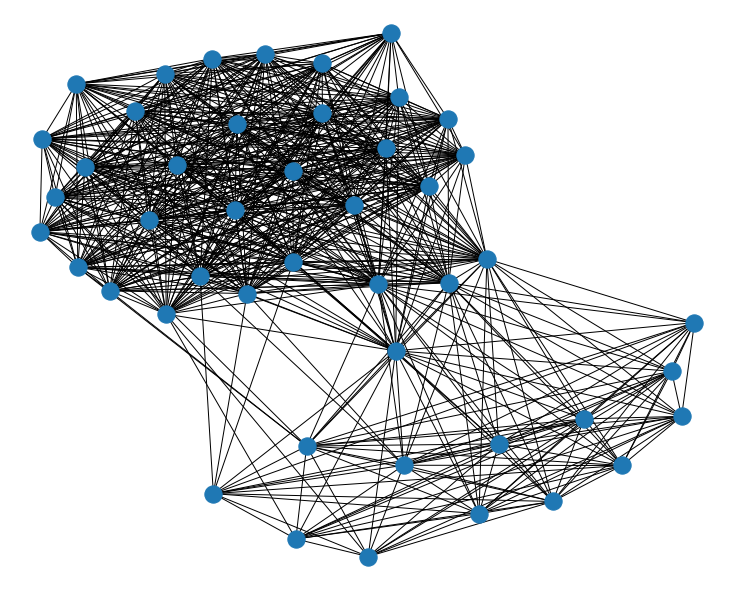

In [45]:
figure(figsize=(10, 8))
#nx.draw_shell(G) #, with_labels=True)
#nx.draw(G)
nx.draw_kamada_kawai(G)

In [46]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
    
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [47]:
df2[:100]

,connections
Assignment to Youthful Trainee Status,42
Order Regarding Voluntary Foster Care Agreement,37
Ex Parte Petition Regarding Voluntary Foster Care Agreement,37
Binding Arbitration Award,34
"Affidavit and Claim, Small Claims",34
Motion and Order for Discharge From Probation,34
Garnishee Disclosure,34
Answer to Complaint to Recover Possession of Property,33
Judgment of Conviction (Designated Case),32
Petition to Discontinue Sex Offender Registration,32


In [48]:
# https://github.com/WestHealth/pyvis/pull/12

In [63]:
net = Network(notebook=True,width="100%",height="830px")
net.from_nx(G)
if 1 == 1:
    net.set_options("""var options = {
      "nodes": {
        "font": {
          "strokeWidth": 6
        }
      },
       "layout": {
        "hierarchical": {
          "enabled": true,
          "levelSeparation": 30,
          "edgeMinimization": false
        }
      },
      "interaction": {
        "navigationButtons": true
      }
    }""")
elif 1 == 1:
    net.set_options("""var options = {
  "nodes": {
    "font": {
      "strokeWidth": 3
    },
    "size": 21
  },
  "physics": {
    "barnesHut": {
      "springLength": 205,
      "avoidOverlap": 1
    },
    "minVelocity": 0.75
  }
}""")
else:
    net.width = "65%"
    #net.show_buttons()
    net.show_buttons(filter_=["layout","nodes","physics"])
    
net.show("scratch.html")

In [64]:
#net.show("docs/sim/%s/network.html"%jur)
os.system('cp scratch.html docs/sim/%s/network.html'%jur)

0